In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import run, np_postprocess
from lucifex.utils import grid, spacetime_grid, cross_section, maximum
from lucifex.viz import plot_colormap, create_animation, plot_line
from lucifex.io import write

from model.dns import dns_model_a


STORE = 1
WRITE = None
DIR = './test_data'

simulation = dns_model_a(store_delta=STORE, write_delta=WRITE, dir_base=DIR)(
    Nx=64,
    Ny=64,
    Ra=1e3,
    Da=5e2,
    epsilon=1e-2,
    cr=0.0,
    c_limits=(0, 1),
    c_seed=(567, 765),
    secondary=True,
)

n_stop = 250
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)
if WRITE:
    np_postprocess(simulation, delete_h5_xdmf=False)

KeyboardInterrupt: 

: 

: 

In [ ]:
c, s, u, psi = simulation['c', 's', 'u', 'psi']
dt, dtCFL, dtK = simulation['dt', 'dtCFL', 'dtK']
sMinMax, cMinMax, uMinMax = simulation['sMinMax', 'cMinMax', 'uMinMax']
f, fBoundary = simulation['f', 'fBoundary']
fInterface = f.sub(0)
fPlus = f.sub(1)
fMinus = f.sub(2)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

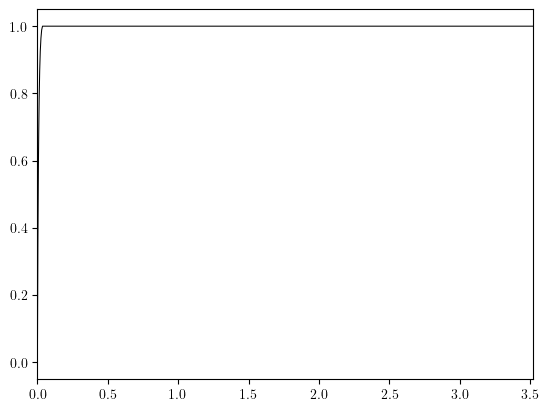

In [ ]:
plot_line((cMinMax.time_series, [i[1] for i in cMinMax.value_series]))

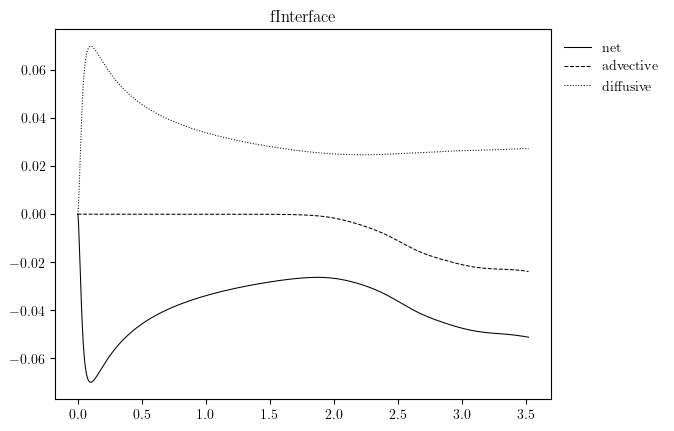

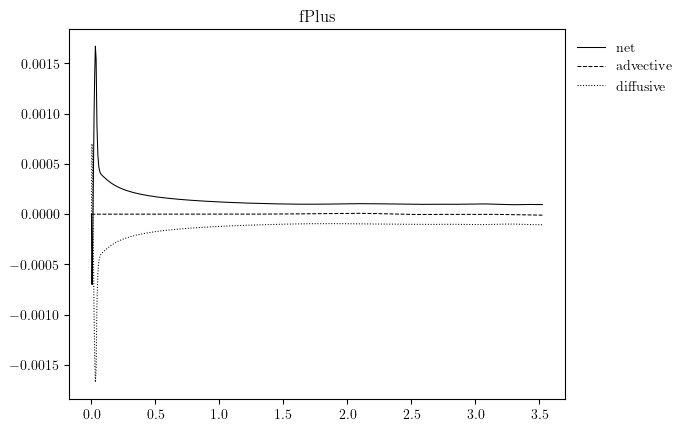

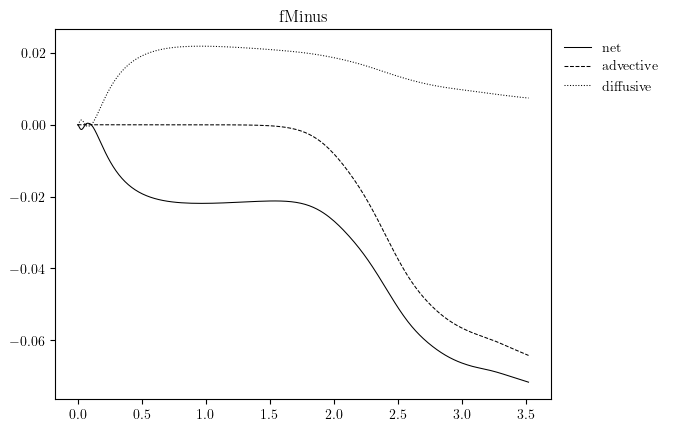

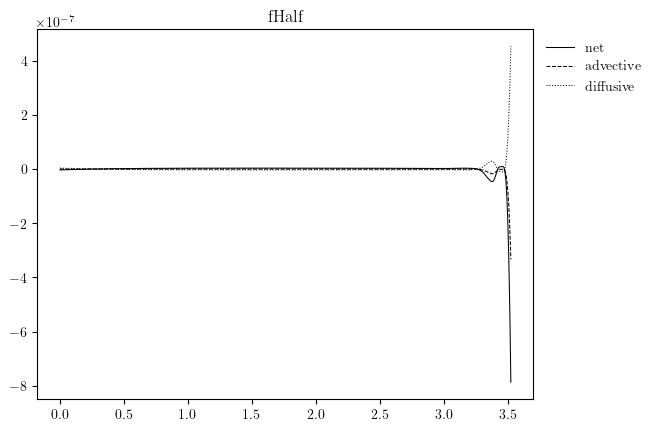

In [4]:
for flux in f.split():
    flux_net = [f[0] - f[1] for f in flux.value_series]
    plot_line(
        [(flux.time_series, flux_net), (flux.time_series, flux.value_series)], 
        title=f'{flux.name}', 
        cyc='black',
        legend_labels=['net', 'advective', 'diffusive'],
    )

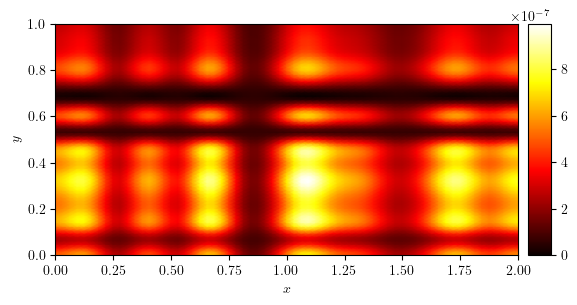

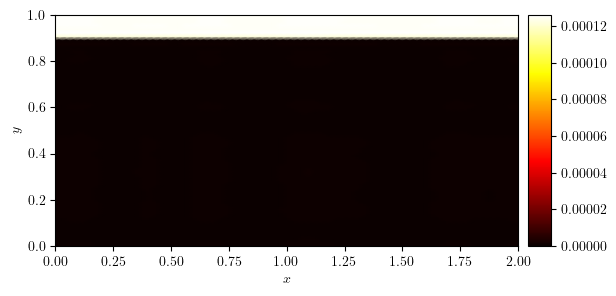

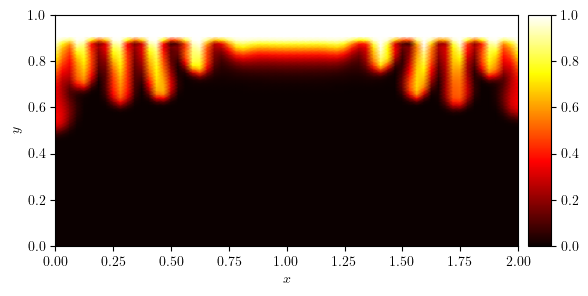

In [6]:
for i in (0, 1, -1):
    fig, ax = plot_colormap(c.series[i])